In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
train=pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Black Friday Sales Pridiction/train.csv')
test=pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Black Friday Sales Pridiction/test.csv')

In [3]:
# Lets check data set

train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Find out Numerical columns from dataset
num_columns = train.select_dtypes(include = ['number']).columns.tolist()
num_columns

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [6]:
# Find out Categorical columns from dataset
cat_columns = train.select_dtypes(exclude = ['number']).columns.tolist()
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [7]:
# Let's arrange numerical and categorical columns based on available data.
num = train[['User_ID' , 'Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
cat = train[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]


In [8]:
# Let's check all categorical columns and theie Unique values 
for I in cat.columns:
    print(I)
    print(cat[I].unique())
    print(cat[I].value_counts())
    print('\n')

Gender
['F' 'M']
M    414259
F    135809
Name: Gender, dtype: int64


Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


City_Category
['A' 'C' 'B']
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


Marital_Status
[0 1]
0    324731
1    225337
Name: Marital_Status, dtype: int64




C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

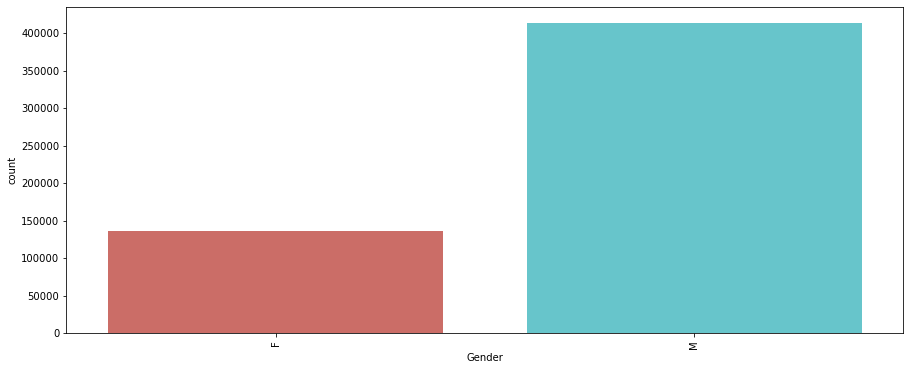

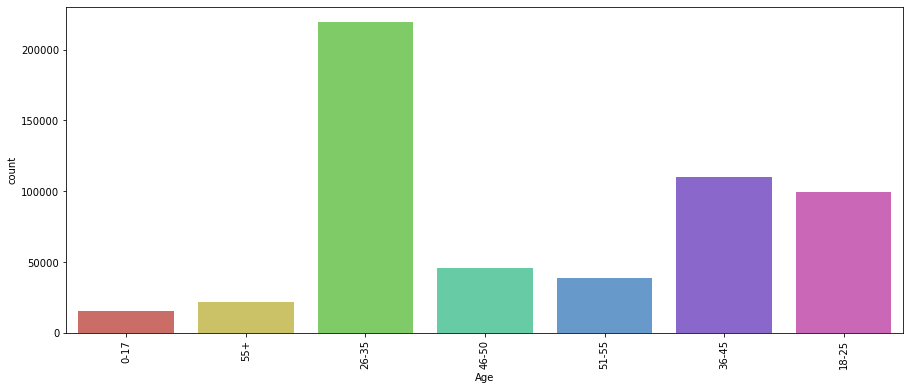

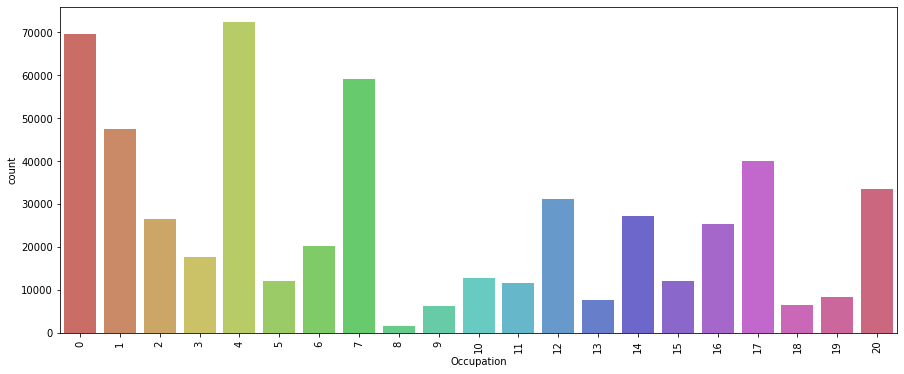

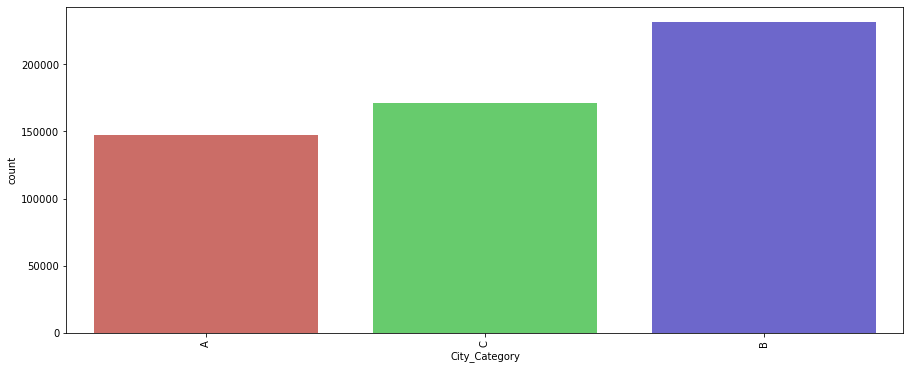

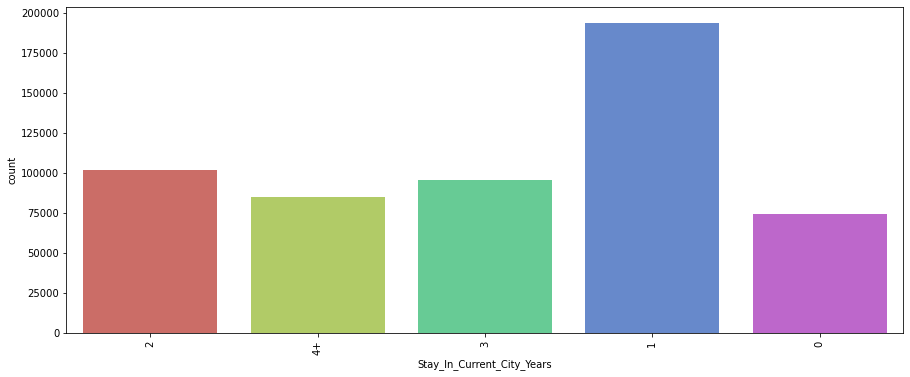

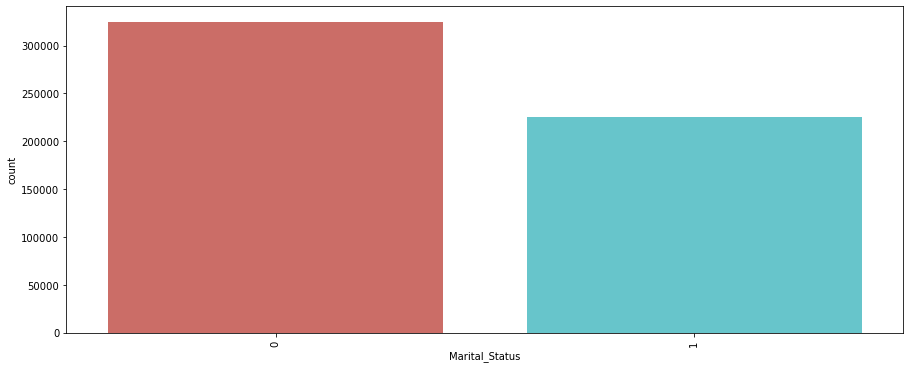

In [9]:
#Let's check Categorical values with the use of graphs.
for i in cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(cat[i], data = cat, palette = 'hls')
    plt.xticks(rotation = 90)
plt.show()

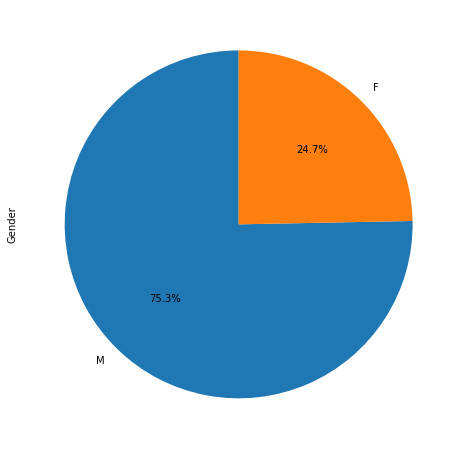

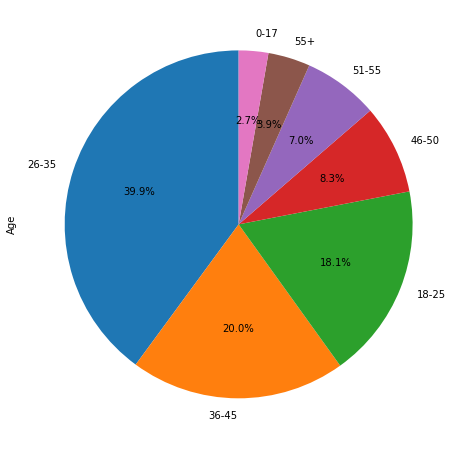

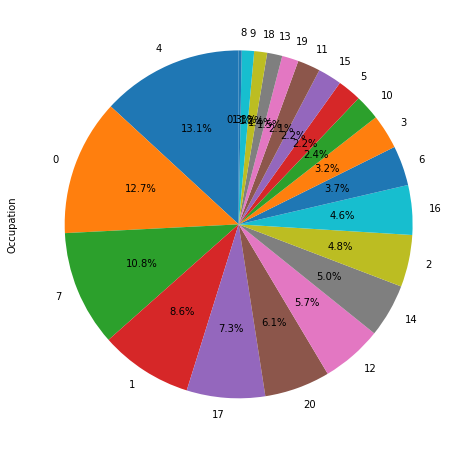

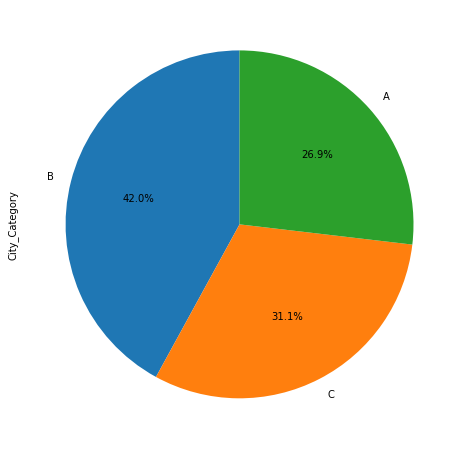

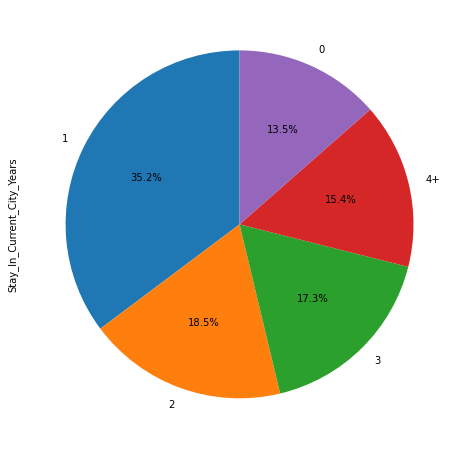

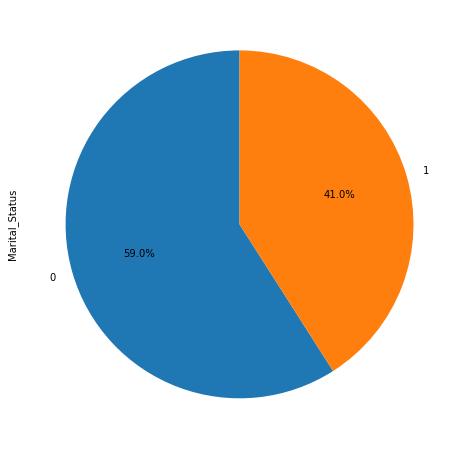

In [10]:
#:Let's check categorical values with the todal percentage of data
for i in cat.columns:
    plt.figure(figsize=(20,8))
    cat[i].value_counts().plot(kind = 'pie',autopct='%1.1f%%', startangle=90)
    plt.xticks(rotation = 90)
    plt.show()


In [11]:
#Let's find out how many missing values in dataset
sum(train.isna().sum())

556885

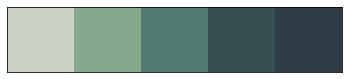

In [12]:
#Let's check missing values based on each coulmns
custom_colors = ["#cad2c5","#84a98c","#52796f","#354f52","#2f3e46"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

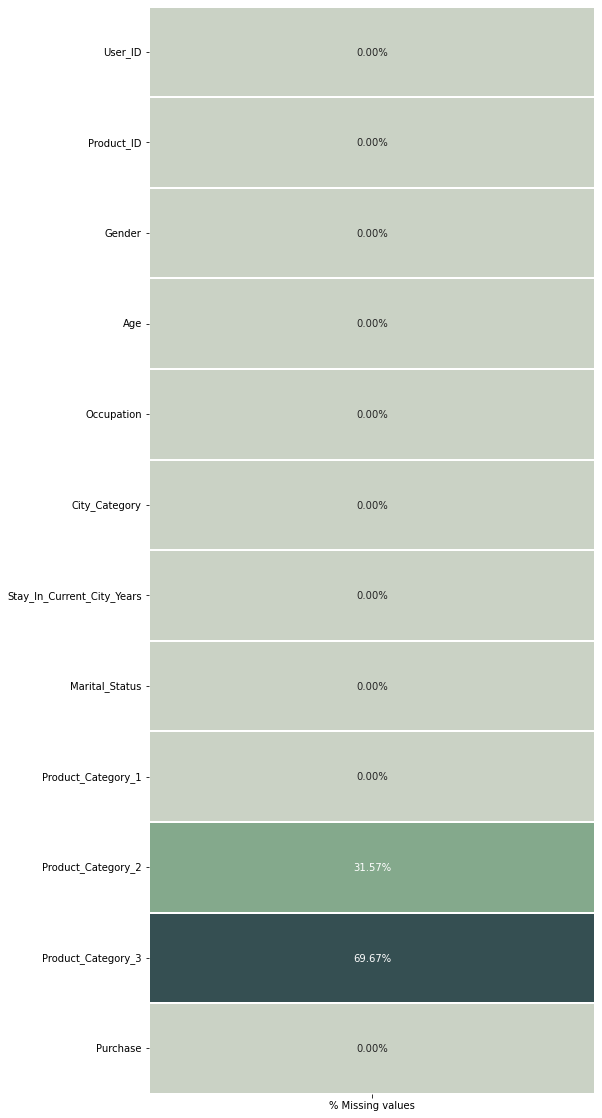

In [13]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = train.isnull().sum()/len(train))
fig = plt.figure(figsize = (20, 20),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

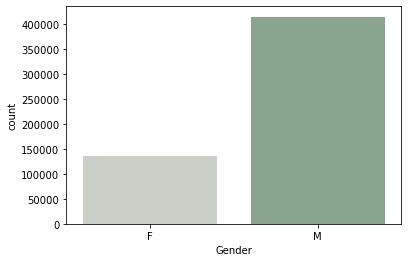

In [14]:
##Visualastion of Gender vs Purchase
sns.barplot(x='Gender',y='Purchase',data=train)
sns.countplot(x='Gender',data=train)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

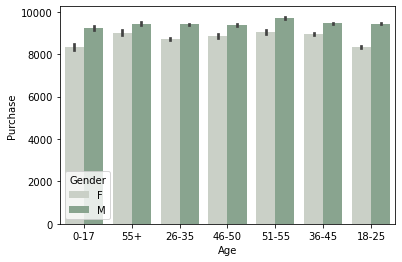

In [15]:
##Visualastion of Age vs Purchase
sns.barplot('Age','Purchase',hue='Gender',data=train)

# Purchasing of man is high then women

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

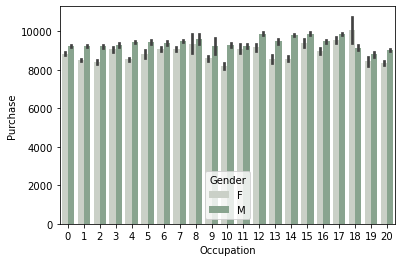

In [16]:
#VIsualization of purchase with Occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=train)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

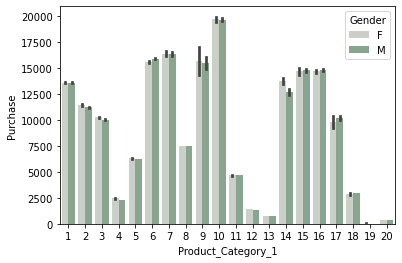

In [17]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=train)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

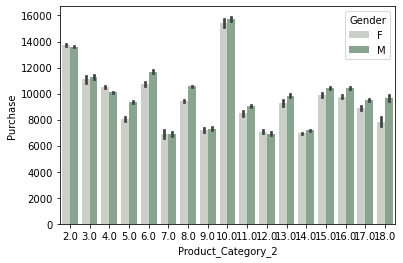

In [18]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=train)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

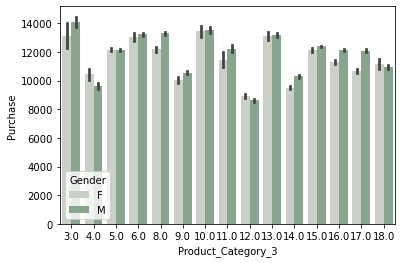

In [19]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=train)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


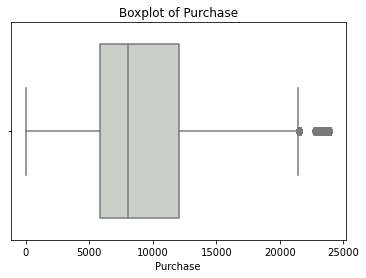

In [21]:
sns.boxplot(train["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [23]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


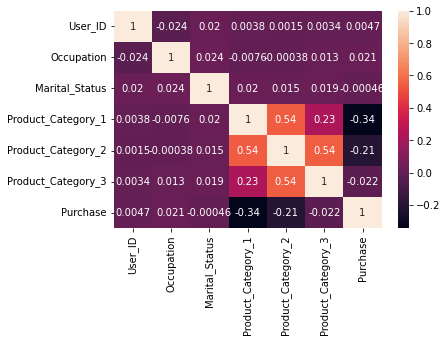

In [25]:
sns.heatmap(train.corr(),annot=True)
plt.show()

In [26]:
df = train.copy()

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [29]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [30]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [31]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [32]:
df['Age'] = lr.fit_transform(df['Age'])

In [33]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [34]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [35]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [36]:
df.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

In [37]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [38]:
X = df.drop("Purchase",axis=1)

In [39]:
y=df['Purchase']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
lr.intercept_

9536.400764131498

In [44]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [45]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [47]:
mean_absolute_error(y_test, y_pred)

3532.0692261658432

In [48]:
mean_squared_error(y_test, y_pred)

21397853.269407514

In [49]:
r2_score(y_test, y_pred)


0.15192944521481677

In [50]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526566


In [51]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)

In [52]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [53]:
dt_y_pred = regressor.predict(X_test)

In [54]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [55]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [56]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [57]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


In [58]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)

In [59]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [60]:
rf_y_pred = RFregressor.predict(X_test)


In [61]:
mean_absolute_error(y_test, rf_y_pred)


2222.049109204734

In [62]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [63]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [64]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


In [65]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
xgb_y_pred = xgb_reg.predict(X_test)

In [67]:
mean_absolute_error(y_test, xgb_y_pred)

2144.8588298827412

In [68]:
mean_squared_error(y_test, xgb_y_pred)

8268802.184348016

In [71]:
r2_score(y_test, xgb_y_pred)

0.67227891659979

In [72]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2875.5525007114747
